In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

In [ ]:
# Load the dataset
data_path = '/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four'

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagenerator = train_datagen.flow_from_directory(
    data_path,
    target_size=(32, 32),
    class_mode='categorical',
    batch_size=32
)

test_data_path = '/content/drive/MyDrive/Phd_Data_set_Implementation/TESTING-FOUR-CLASSES-by-dec20'

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(32, 32),
    class_mode='categorical',
    batch_size=32
)

Found 9645 images belonging to 4 classes.
Found 45 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(32,32, 3)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding= 'same'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [ ]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_26 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        1792      
_________________________________________________________________
zero_padding2d_27 (ZeroPaddi (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 1, 1, 128)        

In [ ]:
history = model.fit(train_datagenerator,epochs=150,validation_data=test_datagenerator,steps_per_epoch=32 )

Epoch 1/150
32/32 [==============================] - 243s 8s/step - loss: 1.3856 - val_loss: 1.3774
Epoch 2/150
32/32 [==============================] - 203s 6s/step - loss: 1.3902 - val_loss: 1.3865
Epoch 3/150
32/32 [==============================] - 212s 7s/step - loss: 1.3947 - val_loss: 1.3816
Epoch 4/150
32/32 [==============================] - 220s 7s/step - loss: 1.3992 - val_loss: 1.3877
Epoch 5/150
32/32 [==============================] - 136s 4s/step - loss: 1.3932 - val_loss: 1.3803
Epoch 6/150
32/32 [==============================] - 151s 5s/step - loss: 1.3935 - val_loss: 1.3887
Epoch 7/150
32/32 [==============================] - 120s 4s/step - loss: 1.4074 - val_loss: 1.4258
Epoch 8/150
32/32 [==============================] - 100s 3s/step - loss: 1.4035 - val_loss: 1.3817
Epoch 9/150
32/32 [==============================] - 133s 4s/step - loss: 1.3941 - val_loss: 1.3724
Epoch 10/150
32/32 [==============================] - 88s 3s/step - loss: 1.3931 - val_loss: 1.3863


In [ ]:
# print("Evaluate")
# result = model.evaluate(test_datagenerator,4)
# dict(zip(model.metrics_names, result))

Evaluate


ValueError: ignored

In [ ]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_26 (3, 3, 3, 64)


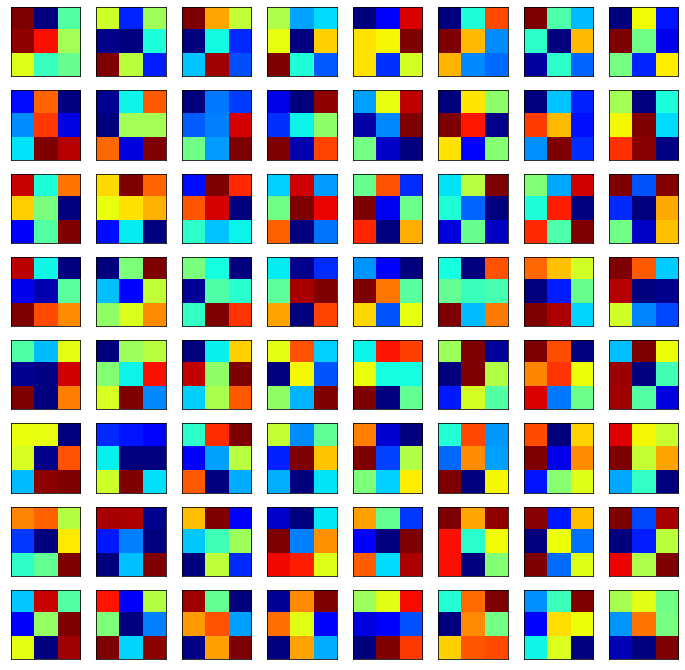

In [ ]:
fig1=plt.figure(figsize=(12, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='jet') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show() 

In [ ]:
### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
#conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_26_input (Inp [(None, 32, 32, 3)]       0         
_________________________________________________________________
zero_padding2d_26 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        1792      
_________________________________________________________________
zero_padding2d_27 (ZeroPaddi (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 4, 4, 64)          0     

In [ ]:
#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/BL/HL_0_1013.jpeg', target_size=(32, 32)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

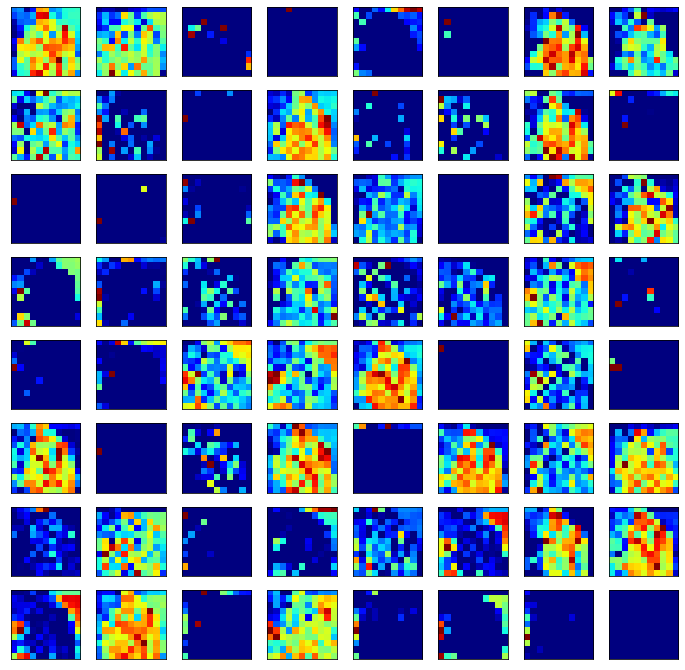

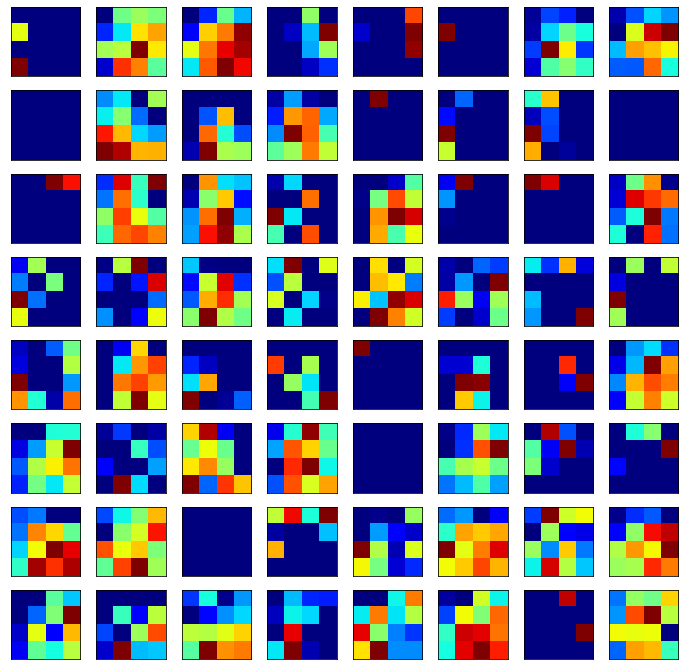

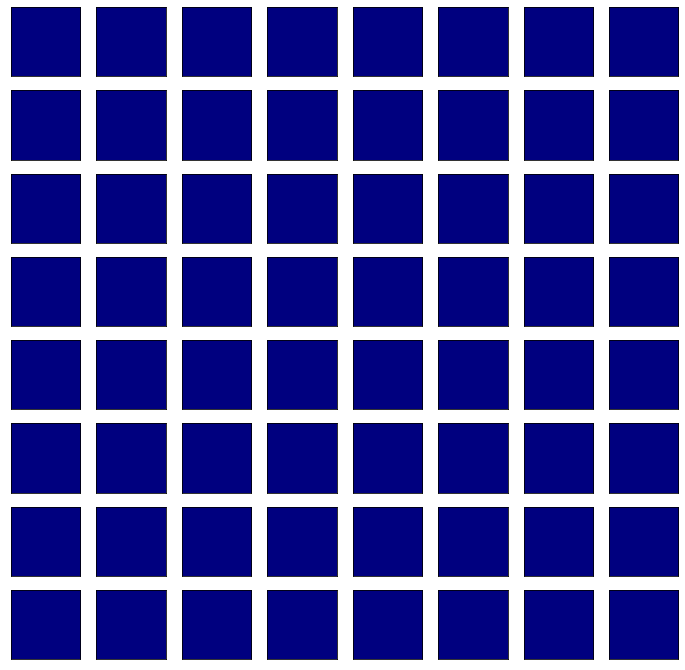

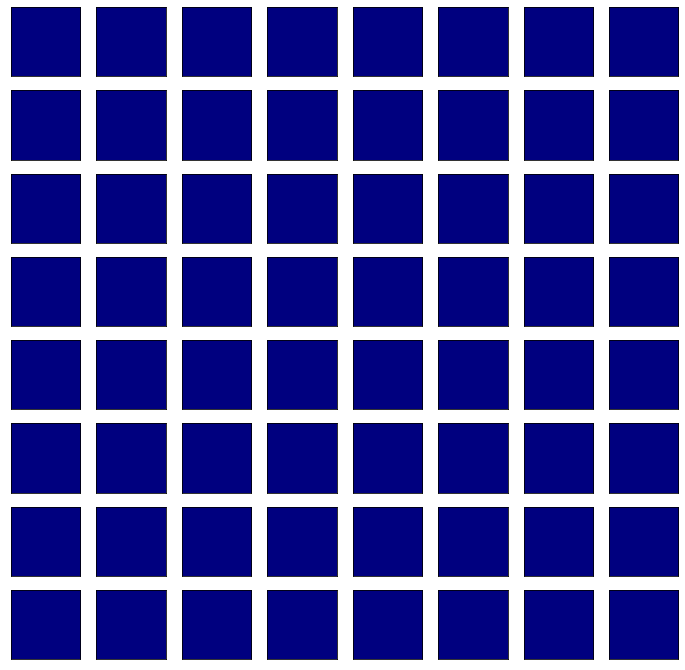

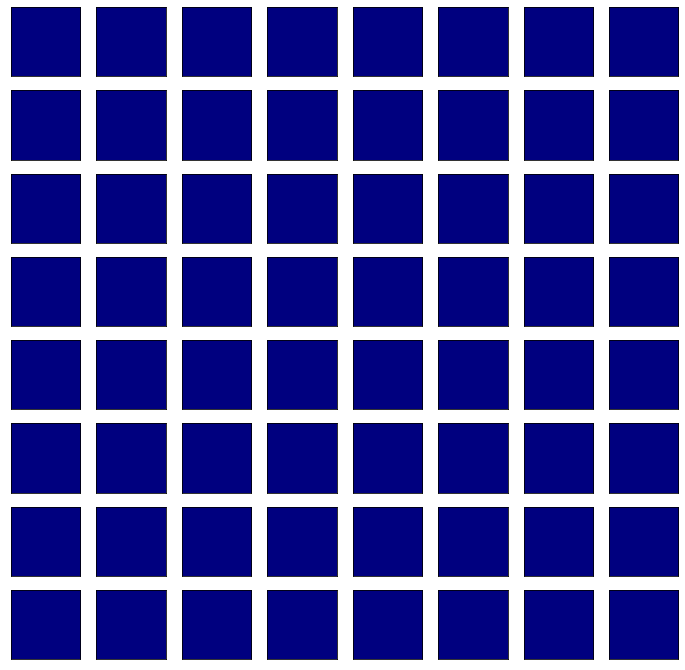

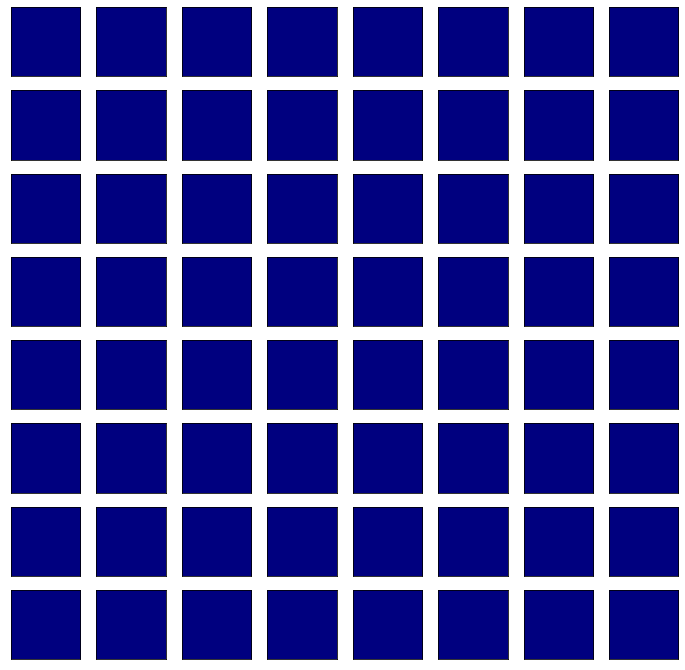

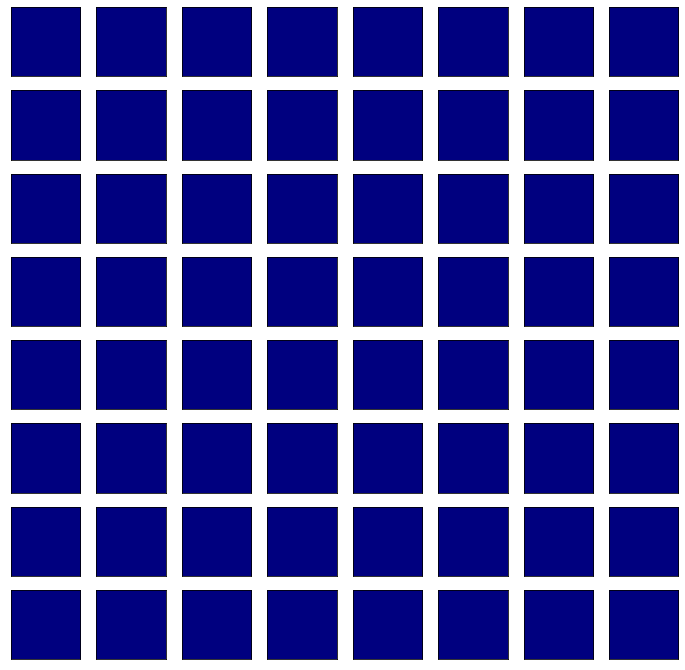

In [ ]:
columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='jet')
        #pos += 1
    plt.show()